In [1]:
# Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import chart_studio.plotly
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [2]:
# Read data here
df = pd.read_csv('term-deposit-marketing-2020.csv')


In [3]:
# Surf on data
df.describe()

,age,balance,day,duration,campaign
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,1274.277550,16.017225,254.824300,2.882175
std,9.641776,2903.769716,8.278127,259.366498,3.239051
min,19.000000,-8019.000000,1.000000,0.000000,1.000000
25%,33.000000,54.000000,8.000000,100.000000,1.000000
50%,39.000000,407.000000,17.000000,175.000000,2.000000
75%,48.000000,1319.000000,21.000000,313.000000,3.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000


/Users/omerfarukyayli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


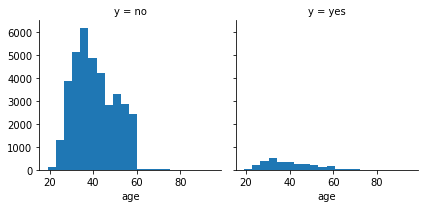

In [4]:
# Analyze single correlation 
grid = sns.FacetGrid(df, col='y')
grid.map(plt.hist, 'age', bins=20).fig.show()

/Users/omerfarukyayli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


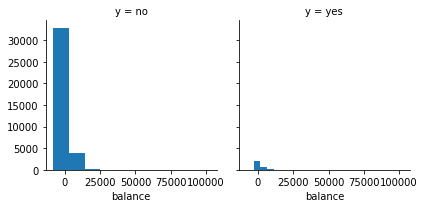

In [5]:
grid = sns.FacetGrid(df, col='y')
grid.map(plt.hist, 'balance', bins=10).fig.show()

/Users/omerfarukyayli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


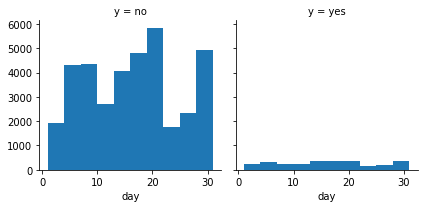

In [6]:
grid = sns.FacetGrid(df, col='y')
grid.map(plt.hist, 'day', bins=10).fig.show()

/Users/omerfarukyayli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


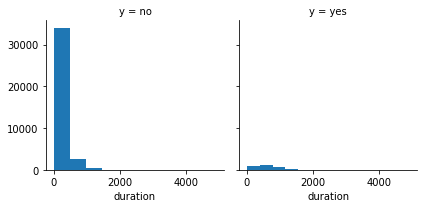

In [7]:
grid = sns.FacetGrid(df, col='y')
grid.map(plt.hist, 'duration', bins=10).fig.show()

/Users/omerfarukyayli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


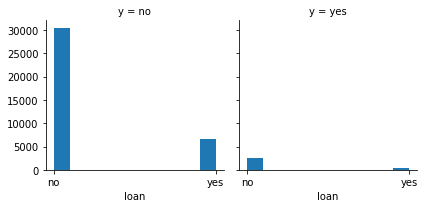

In [8]:
grid = sns.FacetGrid(df, col='y')
grid.map(plt.hist, 'loan', bins=10).fig.show()

/Users/omerfarukyayli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


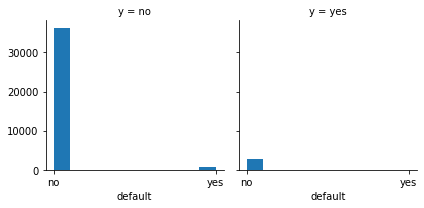

In [9]:
grid = sns.FacetGrid(df, col='y')
grid.map(plt.hist, 'default', bins=10).fig.show()

/Users/omerfarukyayli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


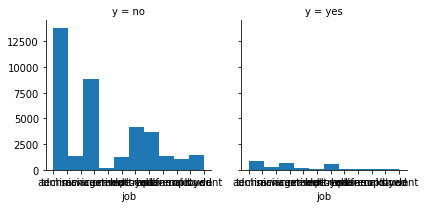

In [10]:
grid = sns.FacetGrid(df, col='y')
grid.map(plt.hist, 'job', bins=10).fig.show()

/Users/omerfarukyayli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


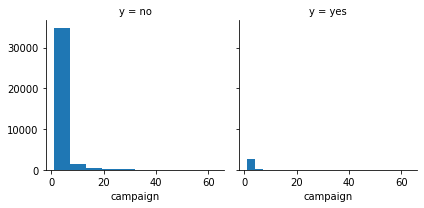

In [11]:
grid = sns.FacetGrid(df, col='y')
grid.map(plt.hist, 'campaign', bins=10).fig.show()

/Users/omerfarukyayli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


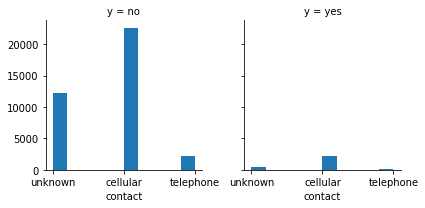

In [12]:
grid = sns.FacetGrid(df, col='y')
grid.map(plt.hist, 'contact', bins=10).fig.show()

/Users/omerfarukyayli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


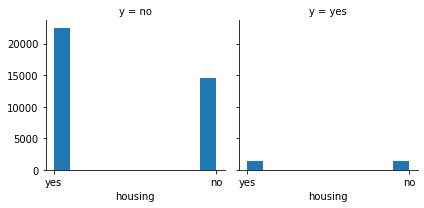

In [13]:
grid = sns.FacetGrid(df, col='y')
grid.map(plt.hist, 'housing', bins=10).fig.show()

/Users/omerfarukyayli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


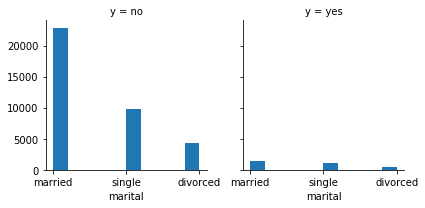

In [14]:
grid = sns.FacetGrid(df, col='y')
grid.map(plt.hist, 'marital', bins=10).fig.show()

/Users/omerfarukyayli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


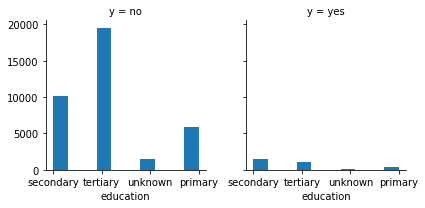

In [15]:
grid = sns.FacetGrid(df, col='y')
grid.map(plt.hist, 'education', bins=10).fig.show()


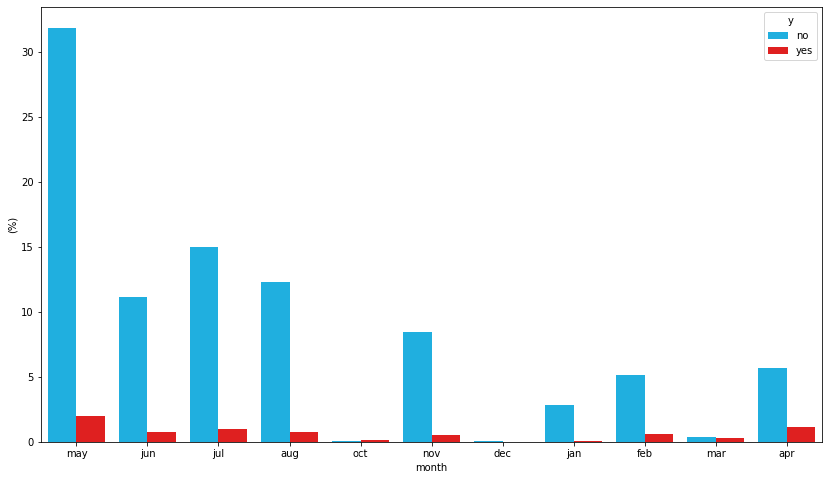

In [16]:
palette = ["deepskyblue", "r"]
ax = plt.subplots(figsize=(14,8))

sns.barplot(x="month", y="balance", hue="y", data=df, palette=palette, estimator=lambda x: len(x) / len(df) * 100)
ax[1].set(ylabel="(%)")
ax[1].set_xticklabels(df["month"].unique(), rotation=0, rotation_mode="anchor")
plt.show()

In [17]:
Age_bw_19_21 =df.loc[(df['age'] >= 19) & (df['age'] <= 21)]

In [18]:
Age_bw_19_21.y.value_counts()
#we can see that over %15 are agreed to open a term deposit (age between 19-21)

no     60
yes    13
Name: y, dtype: int64

In [19]:
Age_bw_70_95 =df.loc[(df['age'] >= 70) & (df['age'] <= 95)]

In [20]:
Age_bw_70_95.y.value_counts()
#we can see that over %40 are agreed to open a term deposit (age betweeen 70-95)


no     49
yes    40
Name: y, dtype: int64

In [21]:
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact','month']
numerical_columns = ['age', 'balance', 'day', 'duration']
X=df[categorical_columns + numerical_columns]
y=df.y
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=42)

categorical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
numerical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='mean'))
])

preprocessing = ColumnTransformer(
    [('cat', categorical_pipe, categorical_columns),
     ('num', numerical_pipe, numerical_columns)])

rf = Pipeline([
    ('preprocess', preprocessing),
    ('classifier', RandomForestClassifier(random_state=42))
])
rf.fit(X_train, y_train)



Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                  

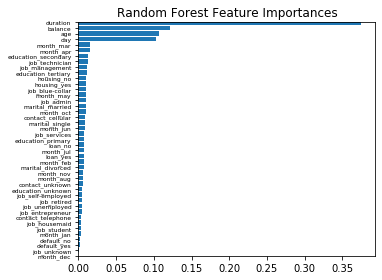

In [22]:
ohe = (rf.named_steps['preprocess']
         .named_transformers_['cat']
         .named_steps['onehot'])
feature_names = ohe.get_feature_names(input_features=categorical_columns)
feature_names = np.r_[feature_names, numerical_columns]

tree_feature_importances = (
    rf.named_steps['classifier'].feature_importances_)
sorted_idx = tree_feature_importances.argsort()

y_ticks = np.arange(0, len(feature_names))
fig, ax = plt.subplots()
ax.set_ymargin(-0.49)

ax.barh(y_ticks, tree_feature_importances[sorted_idx])
ax.set_yticklabels(feature_names[sorted_idx])
ax.set_yticks(y_ticks)
ax.set_title("Random Forest Feature Importances")
fig.tight_layout()
plt.tick_params(axis='y',which='major',labelsize=6)
plt.show()

In [23]:
print("RF train accuracy: %0.3f" % rf.score(X_train, y_train))
print("RF test accuracy: %0.3f" % rf.score(X_test, y_test))


RF train accuracy: 1.000
RF test accuracy: 0.937
